# CURSO DE POSGRADO
# INTELIGENCIA ARTIFICIAL APLICADA A CIENCIAS DE LA SALUD

#### **Universidad Nacional del Litoral** 
![](https://raw.githubusercontent.com/maicobernal/clases_unl/main/imagenes/9986802670.png)

# **Módulo 3**
# **Machine Learning**
![](https://raw.githubusercontent.com/maicobernal/clases_unl/main/imagenes/9351616495.png)

#### **Bibliografia recomendada**
1) Peter Bruce, Andrew Bruce, Peter Gedeck - Practical Statistics for Data Scientists_ 50+ Essential Concepts Using R and Python-O'Reilly Media (2020)

## Clase asincrónica **`1`**

Temas a desarrollar:
- **Validación cruzada**
- **Dev/hold-out.**
- **Optimización de hiperparámetros.**

- - -

### `1. Validación cruzada`

Repasando un poco para ponernos en sintonia, recordamos brevemente que siempre que trabajamos con algoritmos de machine learning para aprendizaje supervisado (es decir, con etiquetas/labels!), necesitamos guardar un porcentaje (en general 20%) de nuestros datos para realizar el testing y las métricas y evaluar la performance de nuestro modelo. 

<img src = "./imagenes/1697309699322.png" style = "width:600px;">


Una pregunta que nos va a surgir cuando empezamos a ahordarnos en esto es....¿Cómo podemos garantizar que el desempeño de nuestro modelo entrenado es independiente de la separación de los datos (train/test) que hicimos?

### Validación Cruzada

<img src = "./imagenes/1697315484667.png" style = "width:600px;">

La **validación cruzada** es una técnica de evaluación de modelos estadísticos que busca asegurar la confiabilidad de los resultados. Se emplea principalmente para verificar que el rendimiento del modelo no dependa de la forma específica en que se dividen los datos entre conjuntos de entrenamiento y prueba.

- **Minimiza el Sesgo**: Ayuda a que los resultados sean independientes de la partición inicial.
- **Detecta Overfitting**: Facilita el reconocimiento de modelos que memorizan los datos en lugar de generalizar.

El método de **k-folds** es uno de los enfoques más utilizados en la validación cruzada. Veamos cómo funciona:

1. **División en Grupos**: Se divide el conjunto total de datos en 'k' subconjuntos (o 'folds').
2. **Iteración**: En cada iteración, uno de los 'k' subconjuntos se usa como conjunto de testep y los otros 'k-1' como conjunto de entrenamiento.
3. **Evaluación**: Se entrena y se evalúa el modelo en cada combinación posible.
4. **Promedio**: Se calcula el rendimiento promedio a partir de las 'k' evaluaciones para obtener una métrica más confiable.
5. **Desviación Estándar**: No sólo es relevante el rendimiento promedio, sino también la desviación estándar de los resultados para entender la variabilidad en la eficacia del modelo.

Imaginemos que contamos con un conjunto de datos con atributos \(X\) y una variable de salida \(y\), donde cada instancia puede ser clasificada como 0 o 1. En este contexto de clasificación binaria, si nos limitamos a un único *train-test split*, nos enfrentamos al riesgo de que nuestras divisiones sean internamente homogéneas pero heterogéneas entre sí. Esto puede deberse a la aleatoriedad inherente a la división inicial.

<img src = "./imagenes/1697315518035.png" style = "width:600px;">

Para mitigar este problema, utilizamos **validación cruzada** o *cross-validation*.

Vamos a utilizar el dataset de cancer de mama.
Pueden encontrar más información [aquí](http://archive.ics.uci.edu/dataset/14/breast+cancer)

* `1 == TUMOR MALIGNO`
* `2 == TUMOR BENIGNO`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

df = pd.read_csv('./databases/breastcancer.csv', index_col = 0)

df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave_points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se            

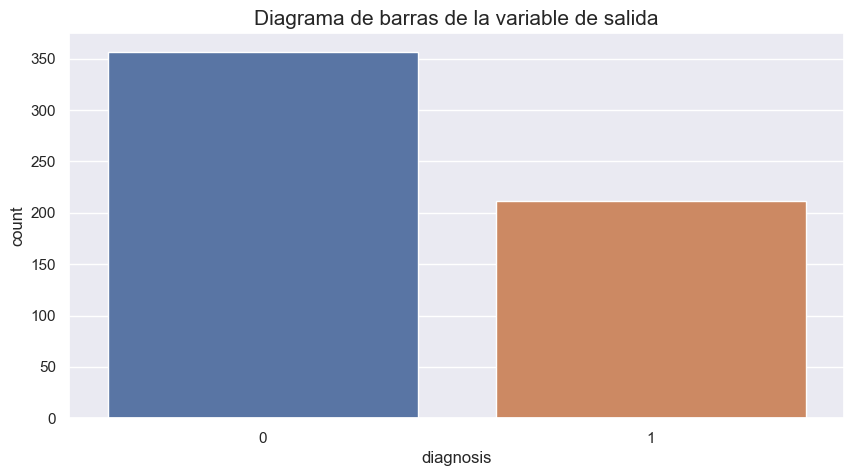

In [3]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'diagnosis' ,label= 'Count', data = df)
plt.title('Diagrama de barras de la variable de salida', fontsize = 15)
plt.show()

In [4]:
# Nos quedamos solamente con los primeros 10 atributos para simplificar el proceso
features_mean = list(df.columns[1:10])
features_mean

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave_points_mean',
 'symmetry_mean']

In [5]:
# Agregamos la variable de salida
subset = df[features_mean + ['diagnosis']]
subset.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,diagnosis
id,,,,,,,,,,
842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,1
842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,1
84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,1
84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,1
84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,1


In [6]:
subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   radius_mean          569 non-null    float64
 1   texture_mean         569 non-null    float64
 2   perimeter_mean       569 non-null    float64
 3   area_mean            569 non-null    float64
 4   smoothness_mean      569 non-null    float64
 5   compactness_mean     569 non-null    float64
 6   concavity_mean       569 non-null    float64
 7   concave_points_mean  569 non-null    float64
 8   symmetry_mean        569 non-null    float64
 9   diagnosis            569 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 48.9 KB


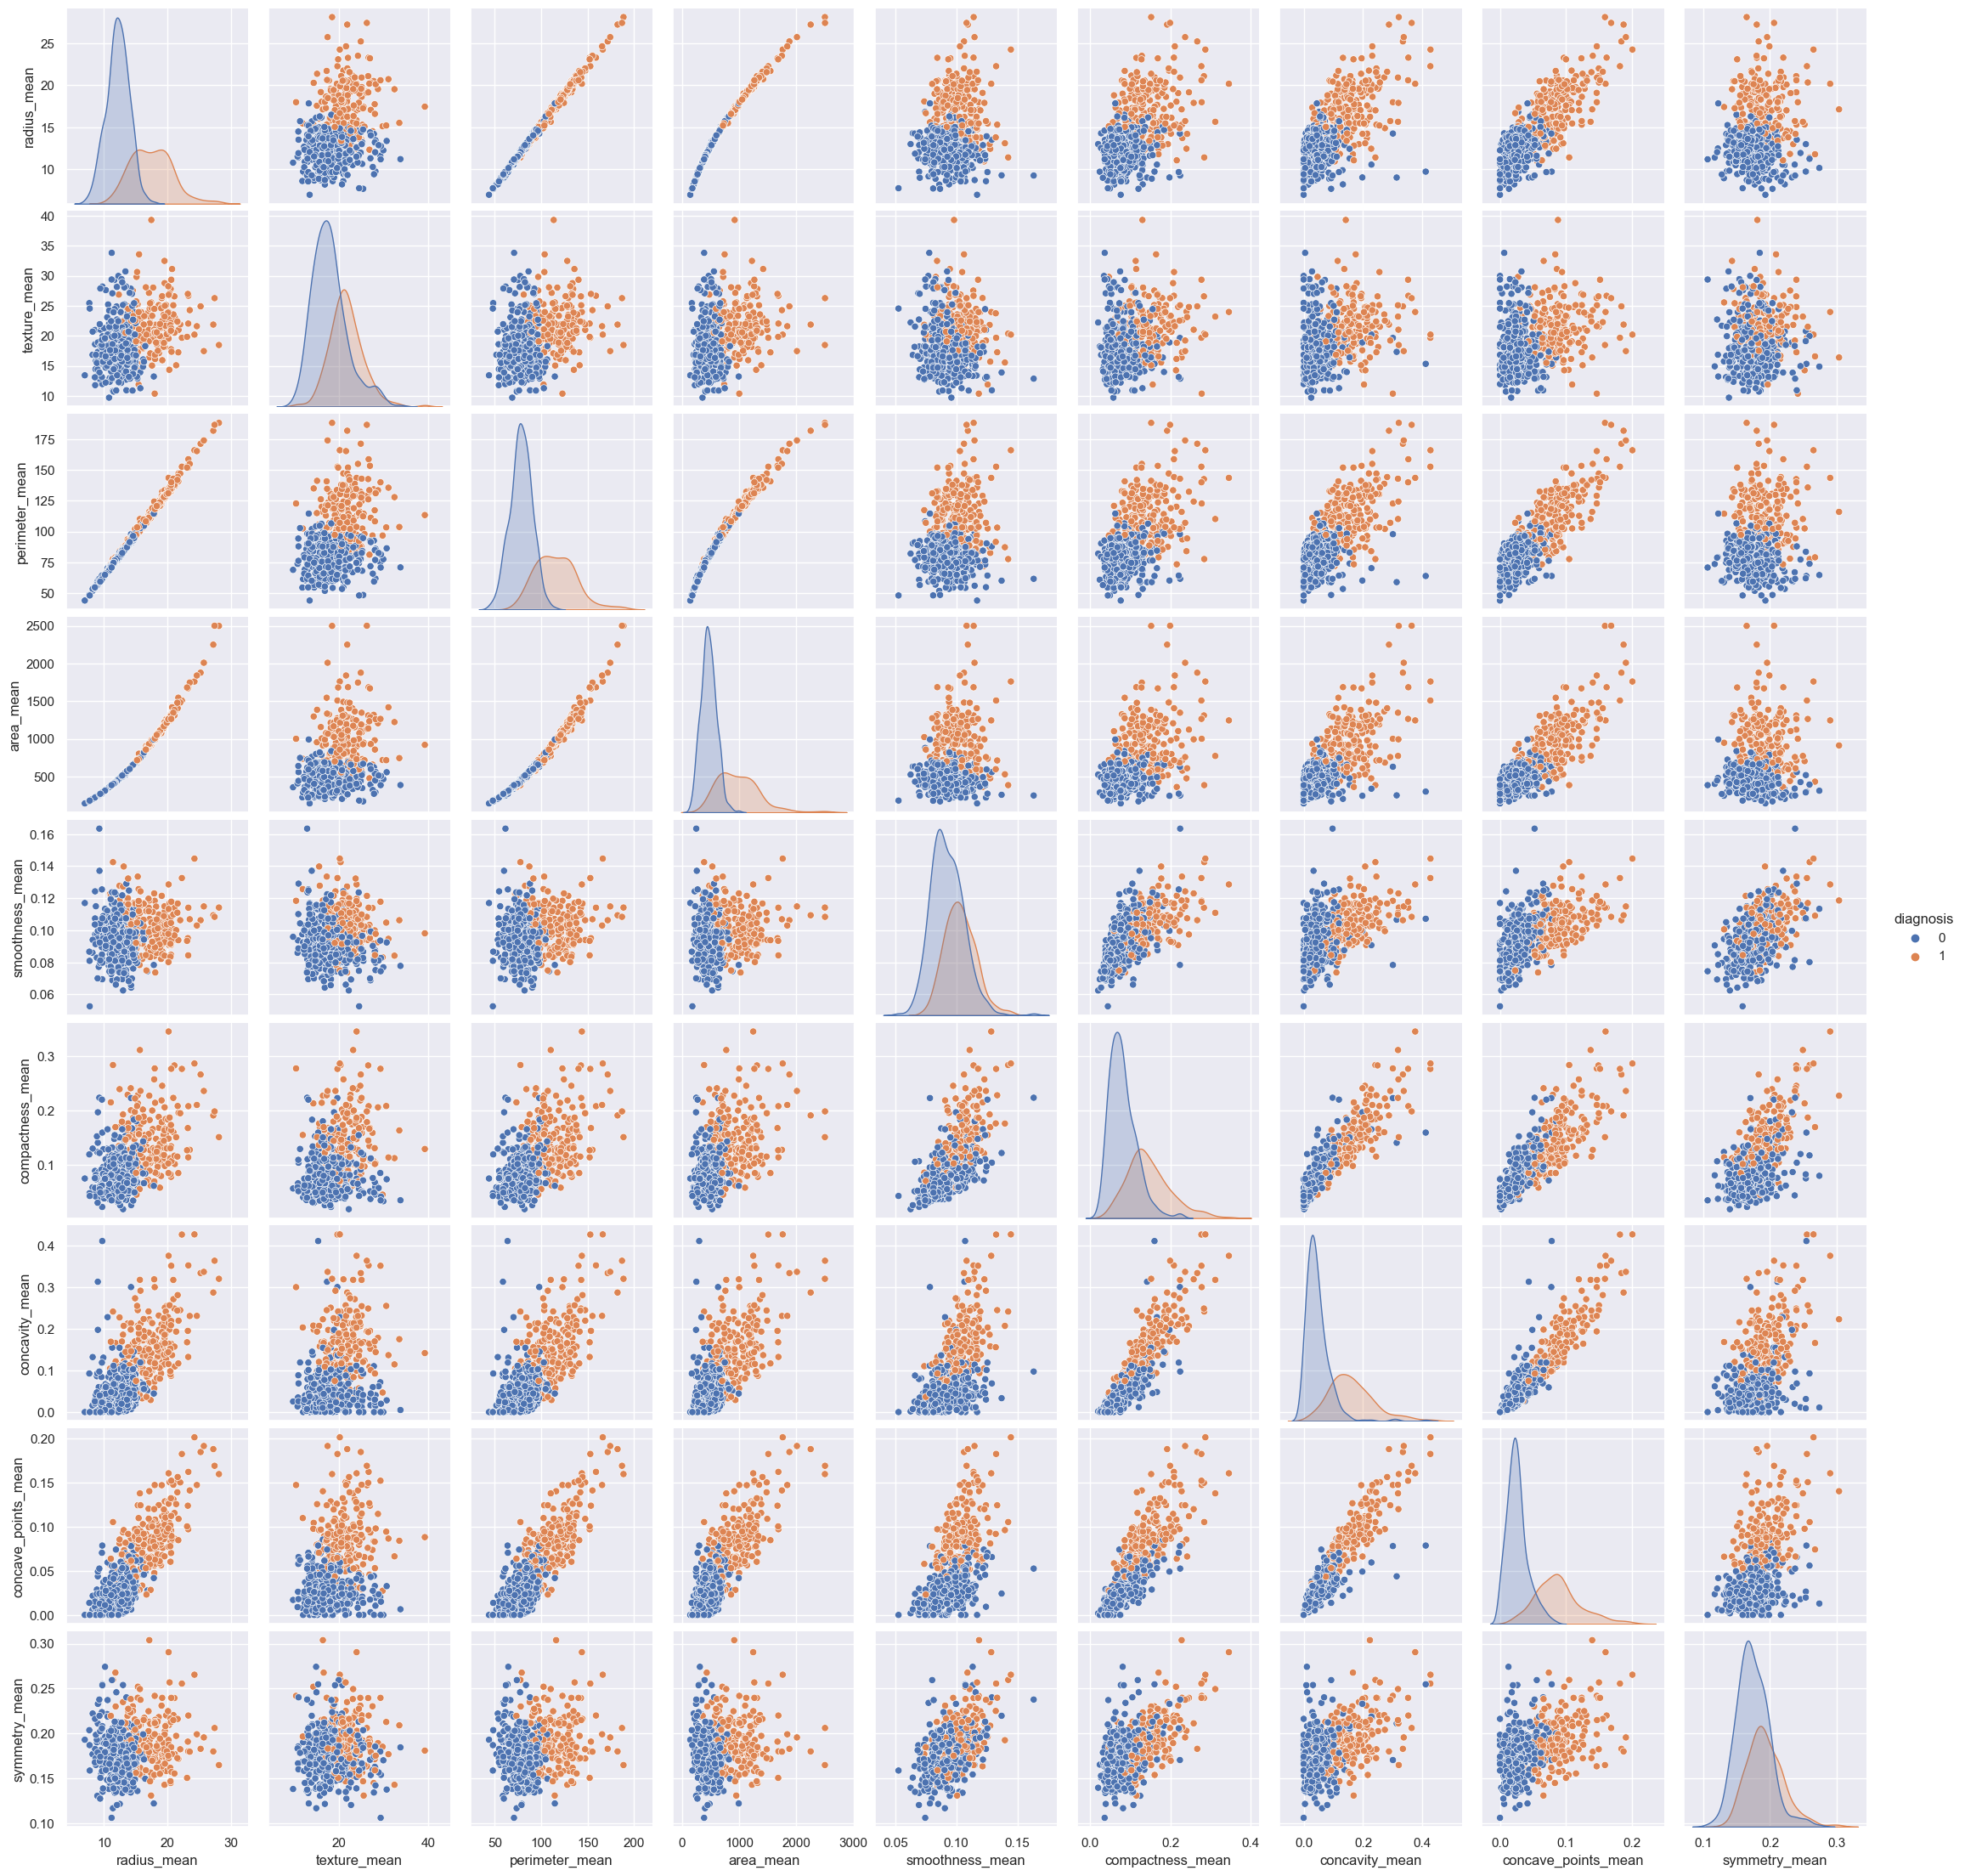

In [7]:
# Hacemos un pairplot
sns.pairplot(subset, hue = 'diagnosis')
plt.show()

In [8]:
# Realizamos el mapa de calor para ver la correlación entre las variables
corr = subset.corr(method = 'spearman', numeric_only=True)
corr.style.background_gradient(cmap='coolwarm').format(precision = 2)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,diagnosis
radius_mean,1.00,0.34,1.00,1.00,0.15,0.50,0.65,0.76,0.12,0.73
texture_mean,0.34,1.00,0.35,0.34,0.02,0.27,0.34,0.31,0.11,0.46
perimeter_mean,1.00,0.35,1.00,1.00,0.18,0.54,0.68,0.79,0.15,0.75
area_mean,1.00,0.34,1.00,1.00,0.14,0.49,0.64,0.76,0.11,0.73
smoothness_mean,0.15,0.02,0.18,0.14,1.00,0.68,0.52,0.57,0.54,0.37
compactness_mean,0.50,0.27,0.54,0.49,0.68,1.00,0.90,0.85,0.55,0.61
concavity_mean,0.65,0.34,0.68,0.64,0.52,0.90,1.00,0.93,0.45,0.73
concave_points_mean,0.76,0.31,0.79,0.76,0.57,0.85,0.93,1.00,0.42,0.78
symmetry_mean,0.12,0.11,0.15,0.11,0.54,0.55,0.45,0.42,1.00,0.33
diagnosis,0.73,0.46,0.75,0.73,0.37,0.61,0.73,0.78,0.33,1.00


### Entrenamiento de los modelos

Vamos a entrenar un árbol profundidad infinita y un modelo K-NN con un vecino. 

In [9]:
# Seleccionamos las variables predictoras X y la variable a predecir
X = subset[['radius_mean','smoothness_mean', 'concave_points_mean']]
y = subset['diagnosis']

In [10]:
from sklearn.preprocessing import StandardScaler

# Realizamos un escalado de los datos. Recuerden que esto es fundamental en K vecinos y SVM
# Estandarizamos nuestras variables
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [11]:
from sklearn.model_selection import train_test_split

# Dividimos el dataset aca asi despues podemos ir probando cambiar algunas cosas 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=99, stratify=y)

Probar sin el argumento stratify en `train_test_split`

In [12]:
print('Proporción de tumores malignos en set de entrenamiento:', round(y_train.sum()/y_train.count(),2))
print('Proporción de tumores malignos en set de testeo:', round(y_test.sum()/y_test.count(),2))

Proporción de tumores malignos en set de entrenamiento: 0.37
Proporción de tumores malignos en set de testeo: 0.37


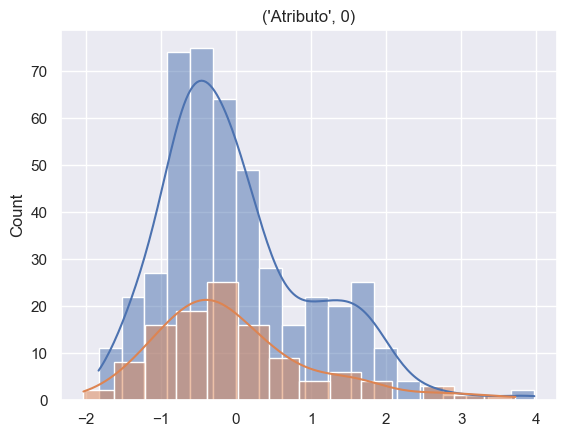

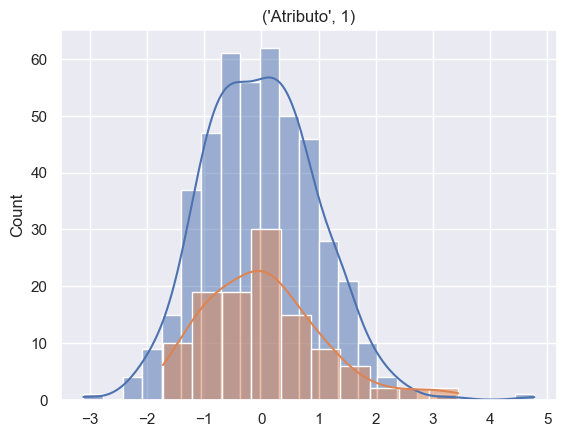

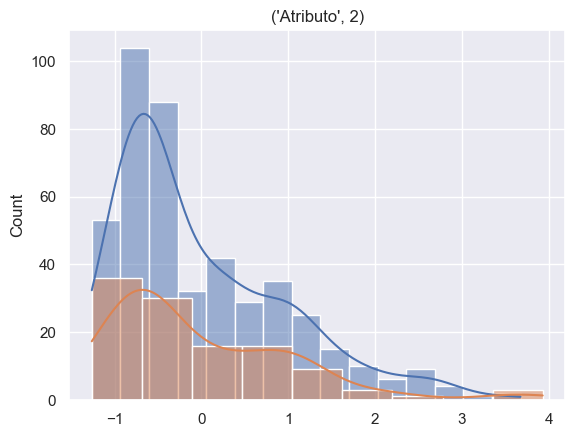

In [13]:
# Chequeamos la distribución de los subsets

for i in range(X_train.shape[1]):
    sns.histplot(x = X_train[:,i], kde=True)
    sns.histplot(x = X_test[:,i], kde=True)
    titulo = 'Atributo', i
    plt.title(titulo)
    plt.show()

Entrenamos nuestro Arbol de Decisión

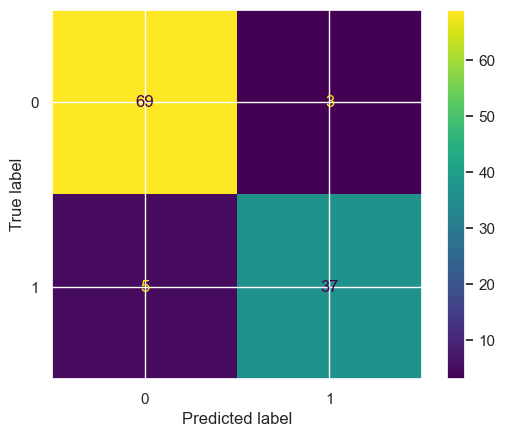

Accuracy: 0.93
Precisión: 0.92
Sensibilidad: 0.88
F1 Score: 0.9


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, f1_score, roc_curve, auc, RocCurveDisplay

# RECUERDEN QUE YA DIVIDIMOS NUESTROS DATASETS ANTES
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo
tree = DecisionTreeClassifier(max_depth = 4, random_state = 42) 

# Entrenar el modelo
tree.fit(X_train, y_train)

# Hacer predicciones
predictions = tree.predict(X_test)

# Vemos la matriz de confusión
conf_matrix = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=tree.classes_)
disp.plot()
plt.show()

# Calculamos las métricas
accuracy = round(accuracy_score(y_test, predictions),2)
precision = round(precision_score(y_test, predictions),2)
recall = round(recall_score(y_test, predictions),2)
f1score = round(f1_score(y_test, predictions),2)

print("Accuracy:", accuracy)
print("Precisión:", precision)
print("Sensibilidad:", recall)
print("F1 Score:", f1score)

Entrenamos nuestro K vecinos

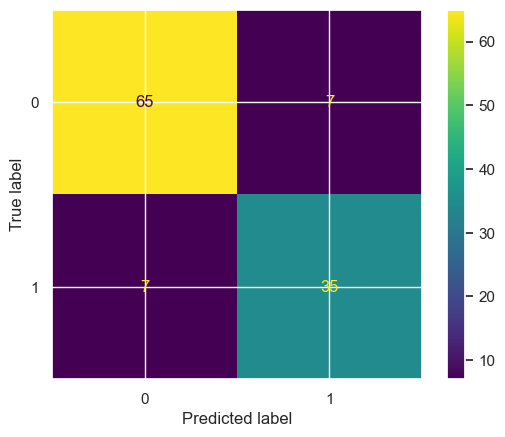

Accuracy: 0.88
Precisión: 0.83
Sensibilidad: 0.83
F1 Score: 0.83


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, f1_score, roc_curve, auc, RocCurveDisplay


# RECUERDEN QUE YA DIVIDIMOS NUESTROS DATASETS ANTES
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo
knn = KNeighborsClassifier(n_neighbors = 3)

#############################
### RECUERDEN QUE YA ESCALAMOS NUESTROS DATOS ANTES!

# Entrenar el modelo
knn.fit(X_train, y_train)

# Hacer predicciones
predictions = knn.predict(X_test)

# Vemos la matriz de confusión
conf_matrix = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=knn.classes_)
disp.plot()
plt.show()

# Calculamos las métricas
accuracy = round(accuracy_score(y_test, predictions),2)
precision = round(precision_score(y_test, predictions),2)
recall = round(recall_score(y_test, predictions),2)
f1score = round(f1_score(y_test, predictions),2)

print("Accuracy:", accuracy)
print("Precisión:", precision)
print("Sensibilidad:", recall)
print("F1 Score:", f1score)

### AHORA VEAMOS COMO SE MODIFICAN LOS DATOS CAMBIANDO EN RANDOM_STATE (SEMILLA)

Cambiar el valor de random state por otro numero y volver a correr los scripts de arriba y ver las metricas

### `Cross-Validation`:

En sklearn es muy sencillo hacerlo.
Por defecto, va a dividir el dataset en 5 con la estrategia KFold, y va a ir en cada iteración cambiando el dataset de testeo. 

In [16]:
from sklearn.model_selection import cross_val_score

# Iniciamos nuestro arbol de decision
tree = DecisionTreeClassifier(max_depth=3)

# Directamente le pedimos que divida el dataset en 5 porciones iguales y entrene y testee 5 modelos distintos
tree_scores = cross_val_score(tree, X, y, cv=5)

# Imprimimos el accuracy de estos modelos
print(tree_scores)
print("Accuracy en Tree: %0.2f (+/- %0.2f)" % (tree_scores.mean(), tree_scores.std() * 2))

[0.87719298 0.90350877 0.9122807  0.92105263 0.89380531]
Accuracy en Tree: 0.90 (+/- 0.03)


In [17]:
from sklearn.model_selection import cross_val_score

# Iniciamos nuestro arbol de decision
knn = KNeighborsClassifier(n_neighbors=2)

# Directamente le pedimos que divida el dataset en 5 porciones iguales y entrene y testee 5 modelos distintos
knn_scores = cross_val_score(knn, X, y, cv=5)

# Imprimimos el accuracy de estos modelos
print(knn_scores)
print("Accuracy en KNN: %0.2f (+/- %0.2f)" % (knn_scores.mean(), knn_scores.std() * 2))

[0.85964912 0.85964912 0.88596491 0.92982456 0.89380531]
Accuracy en KNN: 0.89 (+/- 0.05)


Vemos que según como dividamos el dataset, nuestras métricas cambian completamente! 


<img src = "./imagenes/1697311600425.png" style = "width:600px;">

Ahora probamos con otro método que brinda más información `cross_validate`

In [18]:
from sklearn.model_selection import cross_validate

tree_scores = cross_validate(tree, X, y, cv=5, scoring = ['precision','recall'])

tree_scores

{'fit_time': array([0.00127602, 0.0007658 , 0.00072122, 0.000597  , 0.00057697]),
 'score_time': array([0.00266814, 0.00140715, 0.00153089, 0.00146198, 0.00190306]),
 'test_precision': array([0.82222222, 0.92105263, 0.84782609, 0.88372093, 0.8       ]),
 'test_recall': array([0.86046512, 0.81395349, 0.92857143, 0.9047619 , 0.95238095])}

In [19]:
from sklearn.model_selection import cross_validate

knn_scores = cross_validate(knn, X, y, cv=5, scoring = ['precision','recall'])

knn_scores

{'fit_time': array([0.00063491, 0.00036001, 0.00037408, 0.00033712, 0.00037909]),
 'score_time': array([0.00382423, 0.00364208, 0.00339293, 0.00335908, 0.00324988]),
 'test_precision': array([0.86486486, 0.90909091, 0.89189189, 0.94736842, 0.85714286]),
 'test_recall': array([0.74418605, 0.69767442, 0.78571429, 0.85714286, 0.85714286])}

In [20]:
# Si quisieramos podemos utilizar cualquiera de estas métricas. 
from sklearn.metrics import get_scorer_names

sorted(get_scorer_names())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',

En caso de que queramos dividir el dataset en más mitades, podemos hacerlo de la siguiente forma:

In [21]:
from sklearn.model_selection import cross_validate, StratifiedKFold

# Llamamos a la clase K-Fold y aclaramos la cantidad de N-splits
# Si ponemos shuffle = True va a desordenar el orden de las filas antes de hacer el split
kfold = StratifiedKFold(n_splits=8, shuffle=True, random_state=90210)

knn_scores = cross_validate(knn, X, y, cv=kfold, scoring = ['precision','recall'])

print(knn_scores)


{'fit_time': array([0.00136805, 0.00042486, 0.0003767 , 0.00035977, 0.0003531 ,
       0.00034499, 0.00039291, 0.000386  ]), 'score_time': array([0.00457311, 0.00315809, 0.00325203, 0.00287104, 0.0028851 ,
       0.00281787, 0.00265598, 0.00272202]), 'test_precision': array([0.78571429, 0.89285714, 0.90909091, 0.85185185, 0.80769231,
       0.94117647, 0.95833333, 0.94444444]), 'test_recall': array([0.81481481, 0.92592593, 0.74074074, 0.85185185, 0.80769231,
       0.61538462, 0.88461538, 0.65384615])}


Finalmente, entendiendo estos conceptos, podriamos correr la función de la clase previa y entender como funciona

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

# Los modelos que vamos a usar
models = [
        ('LogReg', LogisticRegression()), 
        ('RF', RandomForestClassifier()),
        ('KNN', KNeighborsClassifier()),
        ('XGB', XGBClassifier()),
        ('ADA', AdaBoostClassifier())
        ]

In [23]:
# Normalizamos los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

# Donde guardamos los datos transitoriamente hastas que termine el loop
dfs = []
results = []
names = []

# Las metricas que queremos que calcule
scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc']

# El loop para hacer cross validation con todos
for name, model in models:
        # Especifica la cantidad de splits y que haga shuffle
        kfold = StratifiedKFold(n_splits=6, shuffle=True, random_state=90210)

        # Corre el cross validation
        cv_results = cross_validate(model, X_train, y_train, cv=kfold, scoring=scoring)
        
        # Guarda los resultados
        results.append(cv_results)
        
        # Guarda el nombre del modelo
        names.append(name)
        
        # Agrego los datos a un dataframe de pandas
        this_df = pd.DataFrame(cv_results)
        this_df['model'] = name

        # Pongo el dataframe en una lista
        dfs.append(this_df)

# Cuando finaliza el loop, junto todos en una sola lista
final = pd.concat(dfs, ignore_index=True)

final

,fit_time,score_time,test_accuracy,test_precision_weighted,test_recall_weighted,test_f1_weighted,test_roc_auc,model
0,0.005528,0.003765,0.921053,0.923920,0.921053,0.919595,0.992560,LogReg
1,0.001442,0.002952,0.894737,0.901382,0.894737,0.891517,0.976935,LogReg
2,0.001229,0.002731,0.894737,0.896424,0.894737,0.892794,0.983631,LogReg
3,0.001097,0.002767,0.881579,0.891991,0.881579,0.882952,0.964050,LogReg
4,0.001088,0.002760,0.947368,0.953748,0.947368,0.947897,0.986794,LogReg
5,0.001614,0.002824,0.920000,0.929057,0.920000,0.917600,0.982523,LogReg
6,0.051672,0.007876,0.934211,0.934041,0.934211,0.933952,0.988095,RF
7,0.055302,0.007784,0.907895,0.908607,0.907895,0.906684,0.960938,RF
8,0.057845,0.008202,0.907895,0.908607,0.907895,0.906684,0.977679,RF
9,0.050523,0.007068,0.894737,0.908601,0.894737,0.896083,0.958547,RF


In [24]:
# Cambiamos el formato del dataframe de pandas
tabla_para_graficar = pd.melt(final,id_vars=['model'],var_name='metrics', value_name='values')

# Lo mostramos
tabla_para_graficar

,model,metrics,values
0,LogReg,fit_time,0.005528
1,LogReg,fit_time,0.001442
2,LogReg,fit_time,0.001229
3,LogReg,fit_time,0.001097
4,LogReg,fit_time,0.001088
...,...,...,...
205,ADA,test_roc_auc,0.931176
206,ADA,test_roc_auc,0.958705
207,ADA,test_roc_auc,0.946075
208,ADA,test_roc_auc,0.972120


In [25]:
# Sacamos el tiempo de entrenamiento - no nos interesa
tabla_para_graficar = tabla_para_graficar.loc[~tabla_para_graficar['metrics'].isin(['fit_time','score_time'])]

# Ponemos nombres mas lindos para interpretar los graficos
tabla_para_graficar['metrics'] = tabla_para_graficar['metrics'].replace(
                                {'test_accuracy': 'Exactitud', 
                                    'test_precision_weighted': 'Precisión', 
                                    'test_recall_weighted': 'Sensibilidad', 
                                    'test_f1_weighted': 'F1 score', 
                                    'test_roc_auc': 'ROC-AUC'})

/var/folders/t_/dcpbg3hd4k9bqxjh2_8bbv1h0000gn/T/ipykernel_32109/4036189951.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabla_para_graficar['metrics'] = tabla_para_graficar['metrics'].replace(


In [26]:
# Graficamos con Plotly
import plotly.express as px

fig = px.box(tabla_para_graficar, x='model', y='values', color='metrics',
        color_discrete_sequence=px.colors.qualitative.G10,
        labels={'values': 'Métrica'},
        hover_data={'metrics': True, 'model': True})

fig.update_layout(title='Comparación de modelos de clasificación',
                title_x = 0.5,
                title_font = dict(size=25),
                legend=dict(title='Métricas', orientation = 'h', font = dict(size = 15), x=0.5, xanchor='center'),
                font=dict(size=18),
                xaxis=dict(title=''))

fig